## Visualizing of EcoFOCI Glider Locations from Science Data Set - small selection

**Dives 1800-1899**

In [1]:
%matplotlib inline

In [2]:
import os
import glob

import xarray as xa
import numpy as np

import cmocean
import matplotlib.pyplot as plt
import matplotlib.dates as mdates


/Users/bell/anaconda2/envs/py36/lib/python3.6/site-packages/cmocean/tools.py:76: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not mpl.cbook.is_string_like(rgbin[0]):


** Results from the threshold being set at 1.0 dT/dz **

In [3]:
data_dir = '/Users/bell/Programs/Python/EcoFOCI_OculusGlider/data/1p0_dtdz/'

In [4]:
xaf = xa.open_mfdataset(data_dir+'p40118*_m.nc',autoclose=True)
try:
    xad = xa.open_mfdataset(data_dir+'p40118*_d.nc',autoclose=True)
except:
    xad = None
try:
    xau = xa.open_mfdataset(data_dir+'p40118*_u.nc',autoclose=True)
except:
    xau = None

### Merged (despiked) Data - profiles which met the threshold criterion - Bin averaged to 1m

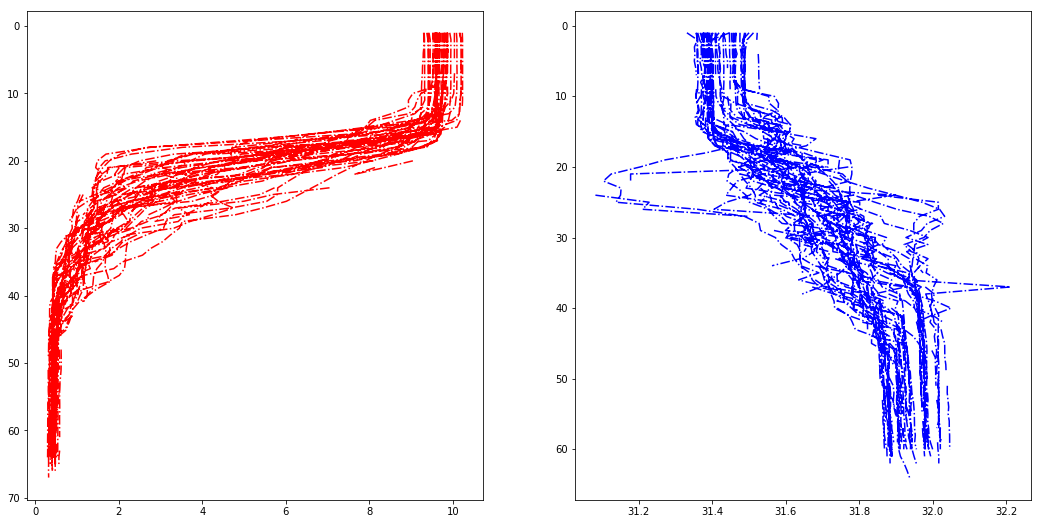

In [6]:
fig = plt.figure(3, figsize=(18,9), facecolor='w', edgecolor='w')
ax1 = fig.add_subplot(121)
plt.plot(xaf.Temperature,xaf.Pressure,'r-.')
ax1.invert_yaxis()
ax1 = fig.add_subplot(122)
plt.plot(xaf.Salinity,xaf.Pressure,'b-.')
ax1.invert_yaxis()


### Upcast / Downcast - unmerged data - Profiles did not meet the threshold criterion.  Bin averaged to 1m

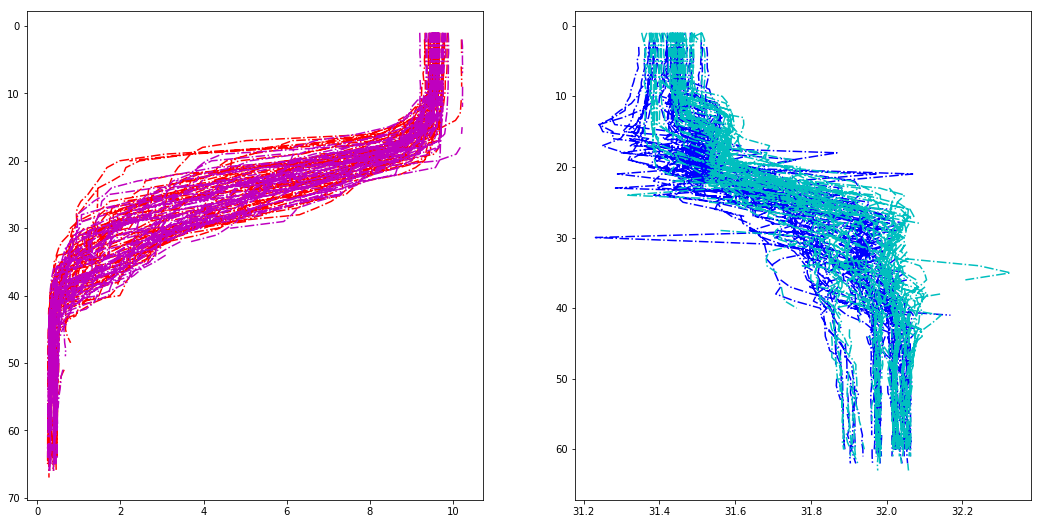

In [7]:
fig = plt.figure(3, figsize=(18,9), facecolor='w', edgecolor='w')
ax1 = fig.add_subplot(121)
plt.plot(xau.Temperature,xau.Pressure,'r-.')
plt.plot(xad.Temperature,xad.Pressure,'m-.')
ax1.invert_yaxis()
ax1 = fig.add_subplot(122)
plt.plot(xau.Salinity,xau.Pressure,'b-.')
plt.plot(xad.Salinity,xad.Pressure,'c-.')
ax1.invert_yaxis()

### Corrected data - Merged only

Contour plot below is of only the profiles which met the sharpness criterion

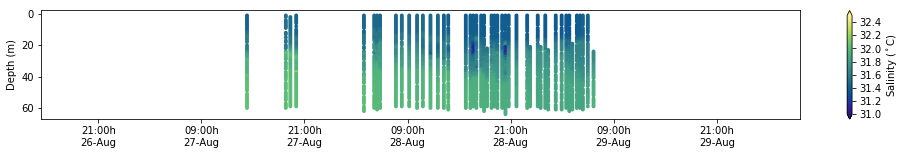

In [8]:
fig, ax = plt.subplots(figsize=(17, 2))
cs = ax.scatter(xaf.time.values, xaf.Pressure, s=15, c=xaf.Salinity, marker='o', edgecolor='none', vmin=31, vmax=32.5, cmap=cmocean.cm.haline)

ax.invert_yaxis()
ax.set_xlim(xaf.time.values[0]-np.timedelta64(1,'D'), xaf.time.values[-1]+np.timedelta64(1,'D'))
xfmt = mdates.DateFormatter('%H:%Mh\n%d-%b')
ax.xaxis.set_major_formatter(xfmt)

cbar = fig.colorbar(cs, orientation='vertical', extend='both')
cbar.ax.set_ylabel('Salinity ($^\circ$C)')
ax.set_ylabel('Depth (m)');

Contour plot below is of only the profiles which met the sharpness criterion and the __upcasts__ of unmerged data

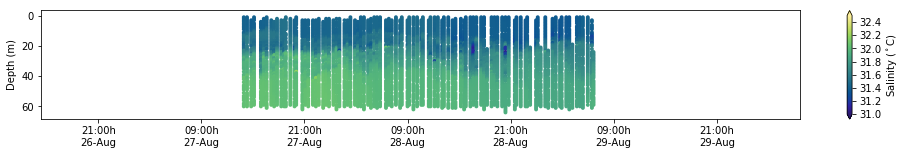

In [9]:
fig, ax = plt.subplots(figsize=(17, 2))
cs = ax.scatter(xau.time.values, xau.Pressure, s=15, c=xau.Salinity, marker='o', edgecolor='none', vmin=31, vmax=32.5, cmap=cmocean.cm.haline)
cs = ax.scatter(xaf.time.values, xaf.Pressure, s=15, c=xaf.Salinity, marker='o', edgecolor='none', vmin=31, vmax=32.5, cmap=cmocean.cm.haline)

ax.invert_yaxis()
ax.set_xlim(xaf.time.values[0]-np.timedelta64(1,'D'), xaf.time.values[-1]+np.timedelta64(1,'D'))
xfmt = mdates.DateFormatter('%H:%Mh\n%d-%b')
ax.xaxis.set_major_formatter(xfmt)

cbar = fig.colorbar(cs, orientation='vertical', extend='both')
cbar.ax.set_ylabel('Salinity ($^\circ$C)')
ax.set_ylabel('Depth (m)');

Contour plot below is of only the profiles which met the sharpness criterion and the __downcasts__ of unmerged data

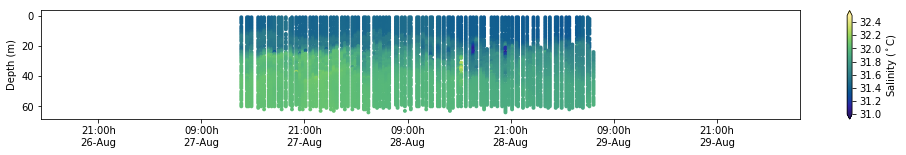

In [112]:
fig, ax = plt.subplots(figsize=(17, 2))
cs = ax.scatter(xad.time.values, xad.Pressure, s=15, c=xad.Salinity, marker='o', edgecolor='none', vmin=31, vmax=32.5, cmap=cmocean.cm.haline)
cs = ax.scatter(xaf.time.values, xaf.Pressure, s=15, c=xaf.Salinity, marker='o', edgecolor='none', vmin=31, vmax=32.5, cmap=cmocean.cm.haline)

ax.invert_yaxis()
ax.set_xlim(xaf.time.values[0]-np.timedelta64(1,'D'), xaf.time.values[-1]+np.timedelta64(1,'D'))
xfmt = mdates.DateFormatter('%H:%Mh\n%d-%b')
ax.xaxis.set_major_formatter(xfmt)

cbar = fig.colorbar(cs, orientation='vertical', extend='both')
cbar.ax.set_ylabel('Salinity ($^\circ$C)')
ax.set_ylabel('Depth (m)');

### Plot original data (from ERDDAP Server)

In [14]:
import urllib
import datetime

OcculusGlider = "http://krafla.pmel.noaa.gov:8080/erddap/tabledap/sg401_b9ae_ed68_1861"
cmap = cmocean.cm.thermal
temp_filename = "data/ogtmp.nc"

start_date="2017-07-15"
end_date  ="2017-12-31" 
urllib.request.urlretrieve(OcculusGlider+".ncCFMA?profileid%2Ctemperature%2Cwlbb2fl_sig700nm_adjusted%2Csalinity%2Cdepth%2Ctime&time%3E="+start_date+"T23%3A52%3A00Z&glider=%22Seaglider%20SG401%22",temp_filename)

start_date_dt = datetime.datetime.strptime(start_date,"%Y-%m-%d"),
end_date_dt   = datetime.datetime.strptime(end_date,"%Y-%m-%d")

In [15]:
dataxa = xa.open_dataset('data/ogtmp.nc')


Same timescale as the above corrected plots

/Users/bell/anaconda2/envs/py36/lib/python3.6/site-packages/numpy/core/_methods.py:29: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims)
/Users/bell/anaconda2/envs/py36/lib/python3.6/site-packages/numpy/core/_methods.py:26: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims)


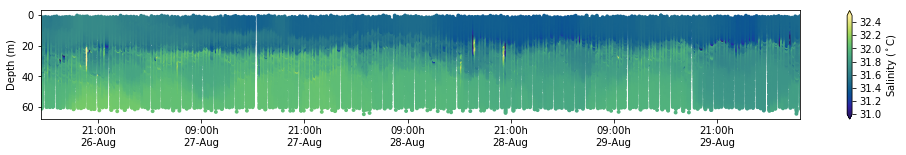

In [16]:
fig, ax = plt.subplots(figsize=(17, 2))
cs = ax.scatter(dataxa.time.values, dataxa.depth, s=15, c=dataxa.salinity, marker='o', edgecolor='none', vmin=31, vmax=32.5, cmap=cmocean.cm.haline)

ax.invert_yaxis()
ax.set_xlim(xaf.time.values[0]-np.timedelta64(1,'D'), xaf.time.values[-1]+np.timedelta64(1,'D'))
xfmt = mdates.DateFormatter('%H:%Mh\n%d-%b')
ax.xaxis.set_major_formatter(xfmt)

cbar = fig.colorbar(cs, orientation='vertical', extend='both')
cbar.ax.set_ylabel('Salinity ($^\circ$C)')
ax.set_ylabel('Depth (m)');

#### Original entire deployment

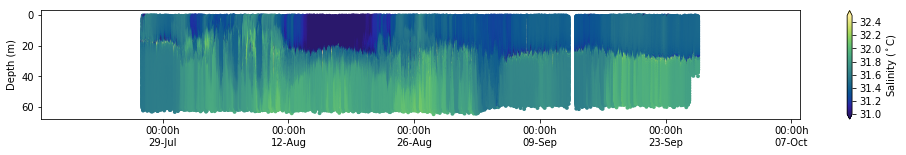

In [17]:
fig, ax = plt.subplots(figsize=(17, 2))
cs = ax.scatter(dataxa.time.values, dataxa.depth, s=15, c=dataxa.salinity, marker='o', edgecolor='none', vmin=31, vmax=32.5, cmap=cmocean.cm.haline)

ax.invert_yaxis()
xfmt = mdates.DateFormatter('%H:%Mh\n%d-%b')
ax.xaxis.set_major_formatter(xfmt)

cbar = fig.colorbar(cs, orientation='vertical', extend='both')
cbar.ax.set_ylabel('Salinity ($^\circ$C)')
ax.set_ylabel('Depth (m)');

upcasts and downcasts of the original dives (red and blu) overlaid with the corrected profiles only

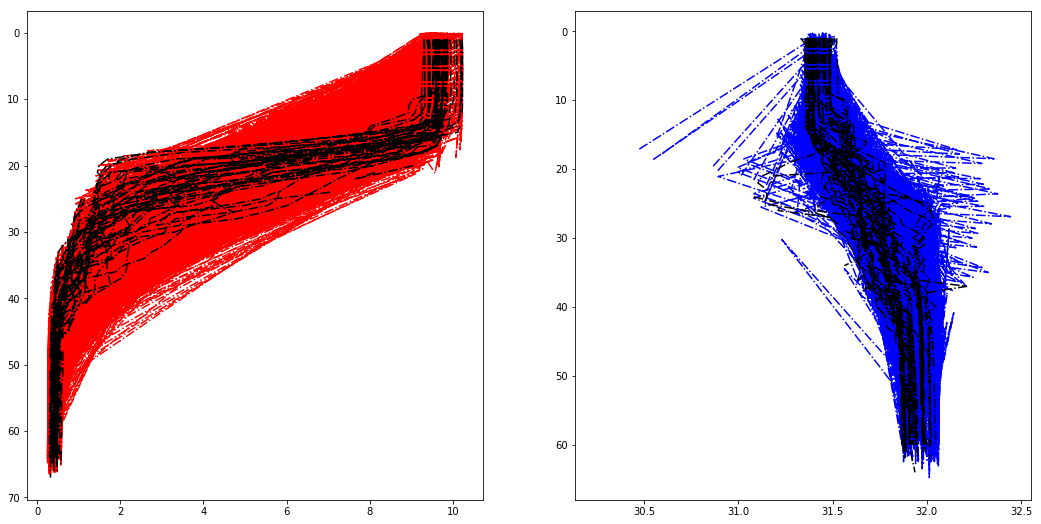

In [18]:
fig = plt.figure(3, figsize=(18,9), facecolor='w', edgecolor='w')
ax1 = fig.add_subplot(121)
plt.plot(dataxa.temperature[1799:1899],dataxa.depth[1799:1899],'r-.')
plt.plot(xaf.Temperature,xaf.Pressure,'k-.')
ax1.invert_yaxis()
ax1 = fig.add_subplot(122)
plt.plot(dataxa.salinity[1799:1899],dataxa.depth[1799:1899],'b-.')
plt.plot(xaf.Salinity,xaf.Pressure,'k-.')
ax1.invert_yaxis()